In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("EastWestAirlines.csv")

In [3]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.shape

(3999, 12)

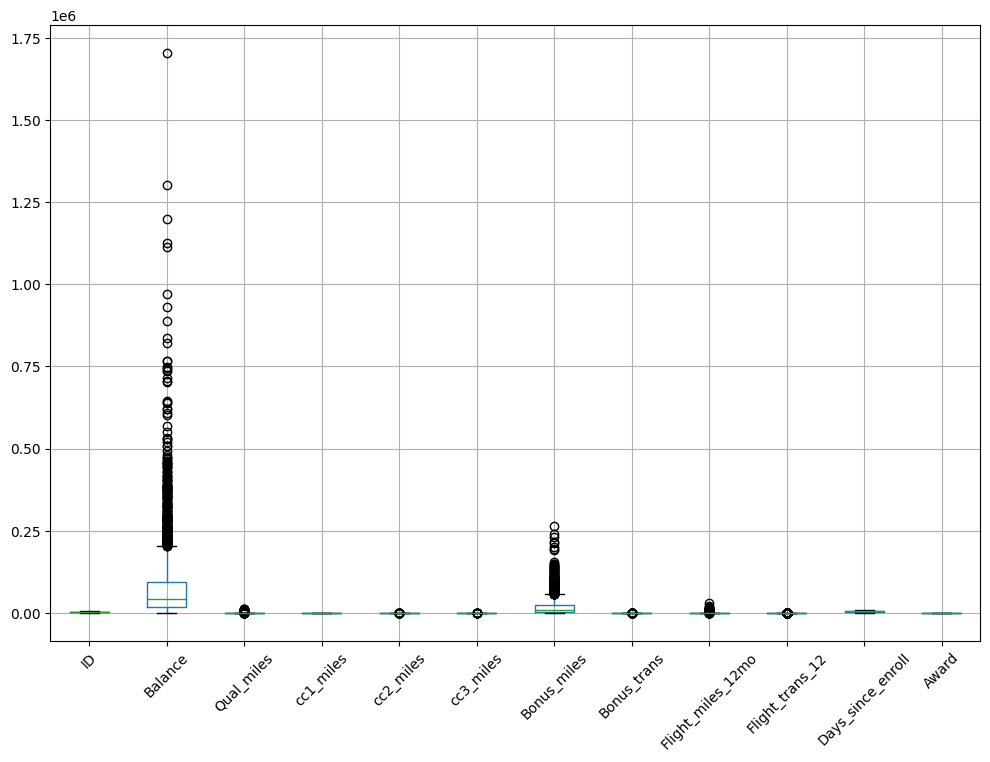

In [6]:
df.boxplot(figsize=(12,8))
plt.xticks(rotation=45)
plt.show()

In [9]:
#Capping of the outliers

In [7]:
def outlier_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df[column] = df[column].apply(
        lambda x: lower_limit if x < lower_limit 
        else upper_limit if x > upper_limit 
        else x
    )

# Apply outlier capping to all numeric columns
for column in df.select_dtypes(include=['int', 'float']).columns:
    outlier_capping(df, column)

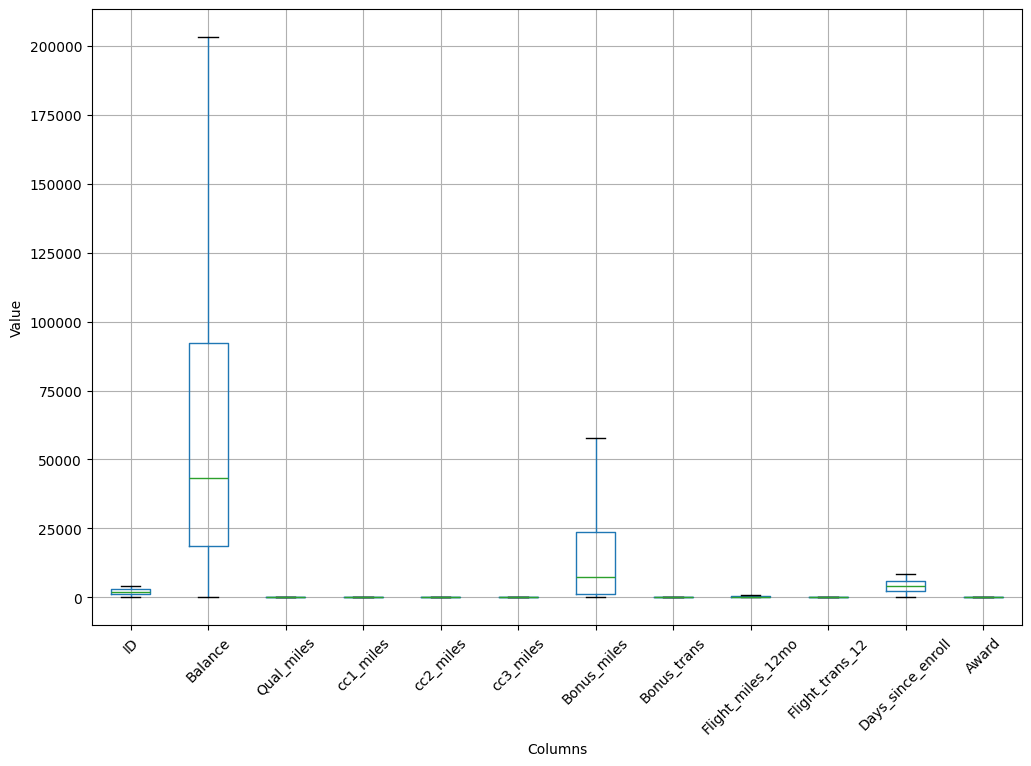

In [8]:
df.boxplot(figsize=(12,8))
plt.xticks(rotation=45)
plt.ylabel("Value")
plt.xlabel("Columns")
plt.show()

In [9]:
df.shape

(3999, 12)

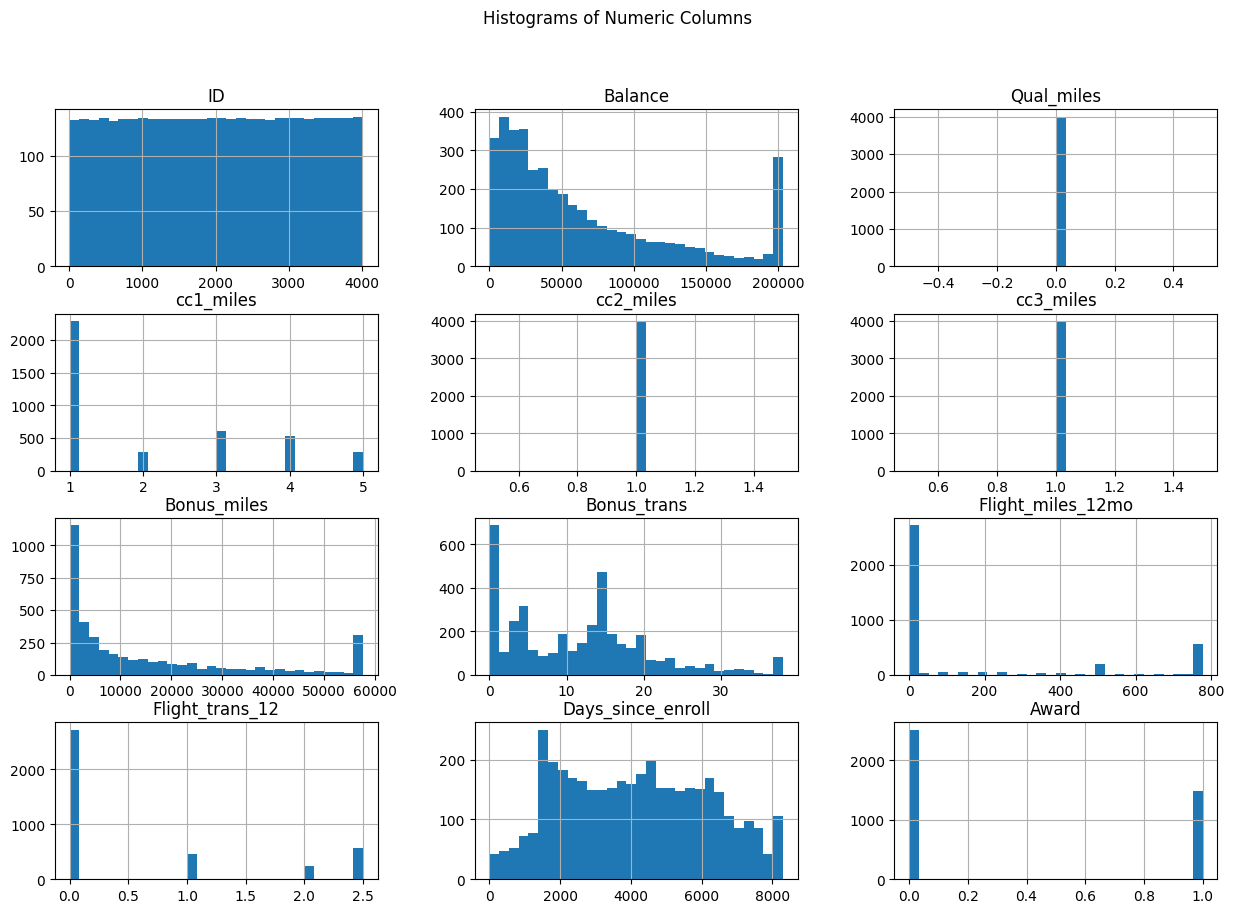

In [10]:
# Histogram for numeric columns
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Histograms of Numeric Columns")
plt.show()

In [11]:
corr = df.corr()

In [12]:
corr

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,1.000000,-0.269374,NaN,-0.224465,NaN,NaN,-0.210868,-0.156118,-0.083917,-0.082887,-0.964988,-0.177901
Balance,-0.269374,1.000000,NaN,0.446510,NaN,NaN,0.494422,0.409017,0.297045,0.295565,0.286143,0.170678
Qual_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc1_miles,-0.224465,0.446510,NaN,1.000000,NaN,NaN,0.912531,0.627786,0.098786,0.087618,0.230849,0.335457
cc2_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc3_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus_miles,-0.210868,0.494422,NaN,0.912531,NaN,NaN,1.000000,0.663558,0.205801,0.193669,0.217320,0.394061
Bonus_trans,-0.156118,0.409017,NaN,0.627786,NaN,NaN,0.663558,1.000000,0.310543,0.308518,0.170308,0.337444
Flight_miles_12mo,-0.083917,0.297045,NaN,0.098786,NaN,NaN,0.205801,0.310543,1.000000,0.942734,0.095019,0.293119
Flight_trans_12,-0.082887,0.295565,NaN,0.087618,NaN,NaN,0.193669,0.308518,0.942734,1.000000,0.091898,0.300085


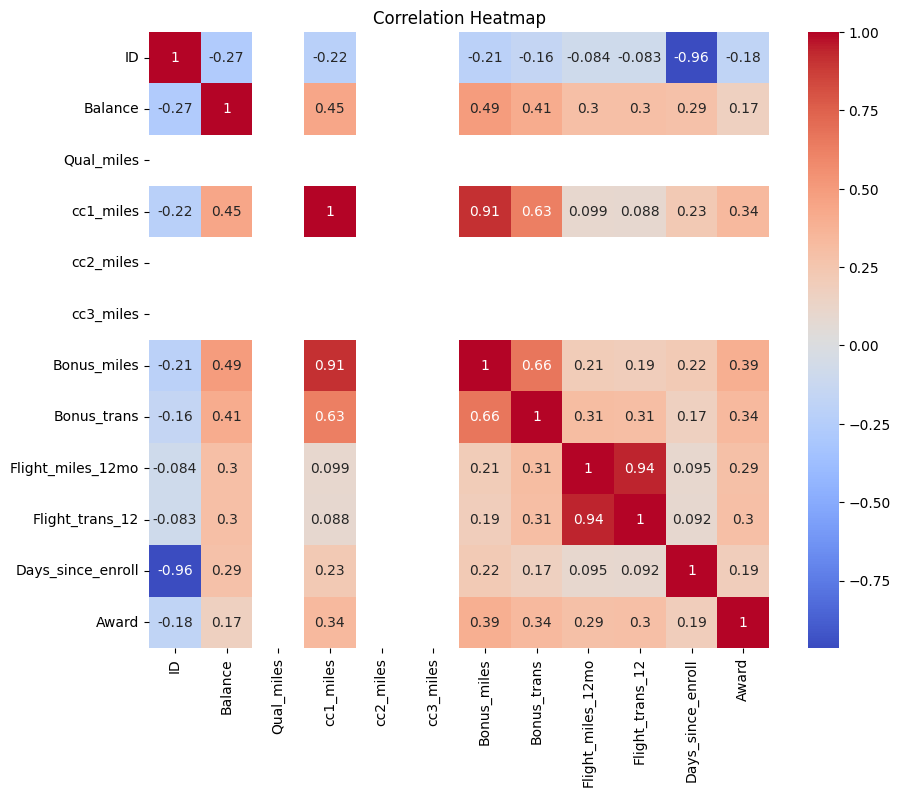

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
sns.pairplot(df.sample(300))  # limit to sample for speed


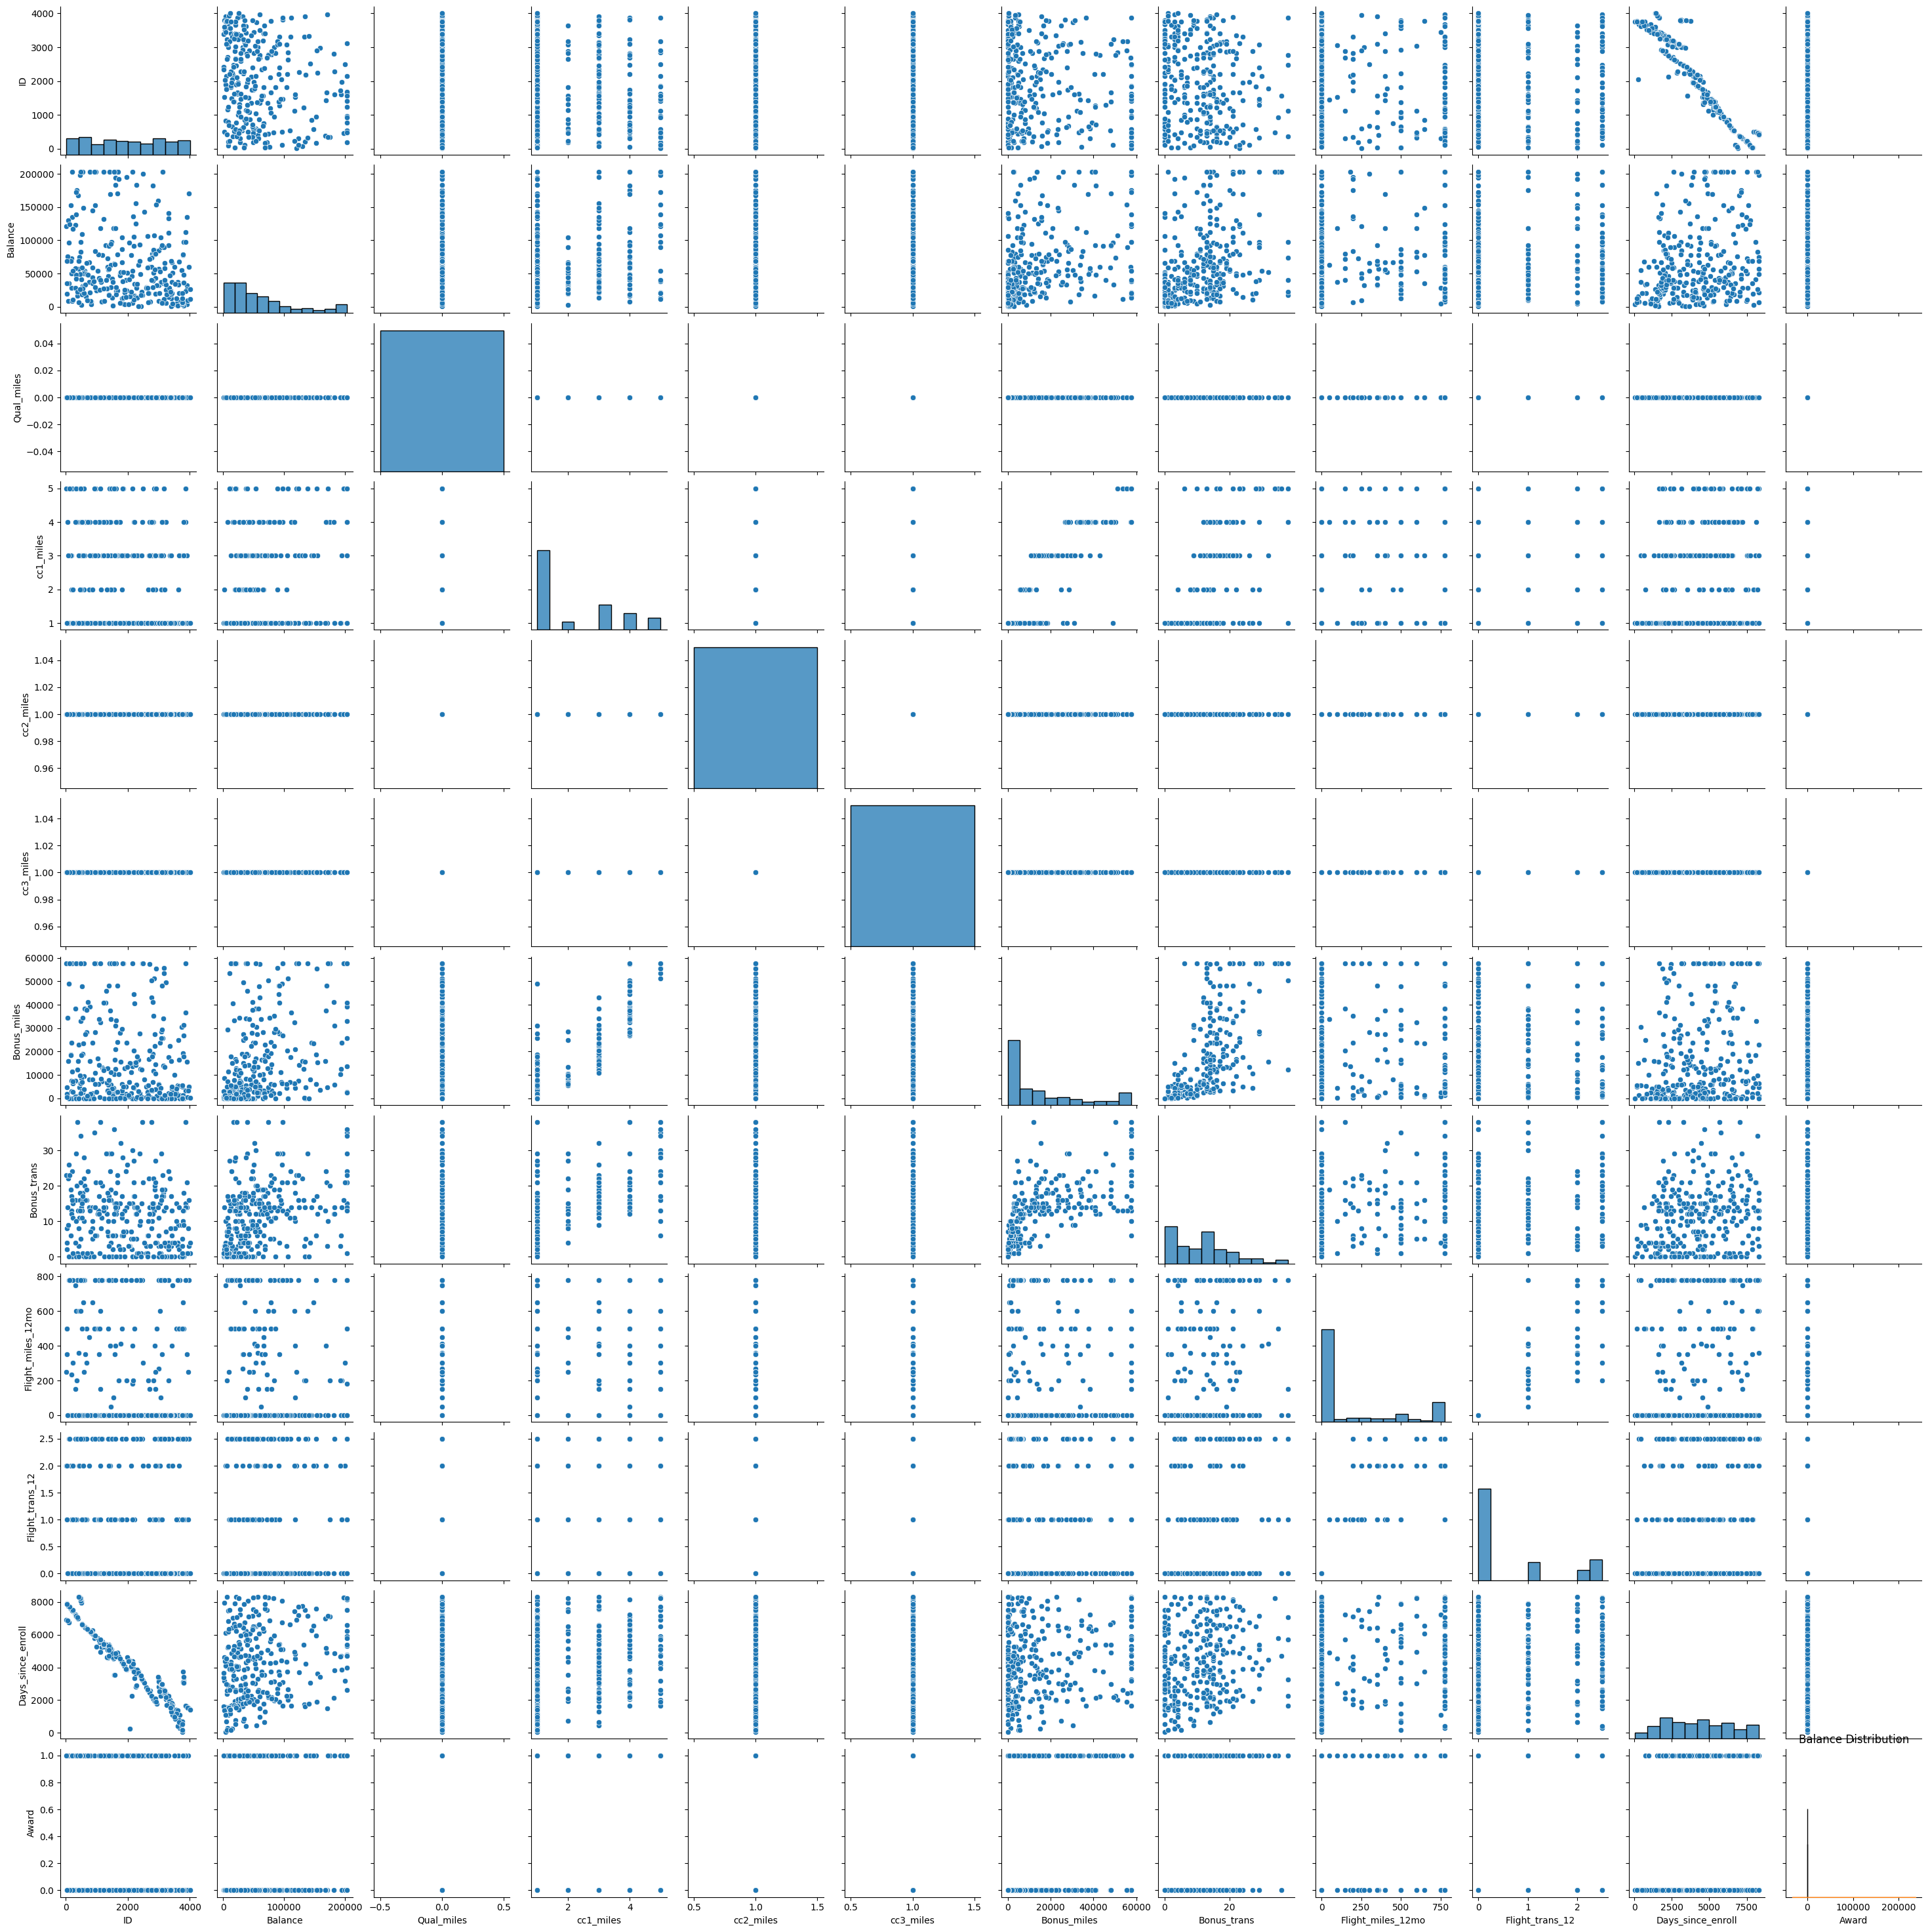

In [14]:
sns.kdeplot(df['Balance'], fill=True)
plt.title("Balance Distribution")
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors

In [16]:
df_numeric = df.select_dtypes(include=[np.number]).copy()

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(df_numeric.values)

In [18]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

In [19]:
X_pca

array([[-1.06822668, -2.11296717],
       [-1.08112902, -2.09534662],
       [-0.76358218, -2.11263303],
       ...,
       [-0.35584903,  0.80978461],
       [-1.761454  ,  2.22488452],
       [-2.89891659,  0.84779708]], shape=(3999, 2))

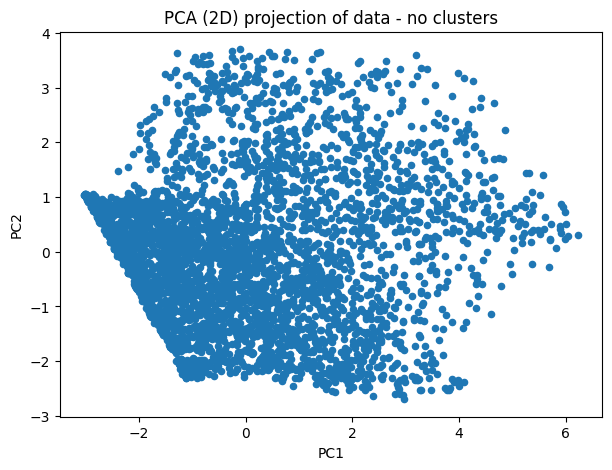

In [20]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=20)
plt.title("PCA (2D) projection of data - no clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [21]:
#K-Means algorithm

In [22]:
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

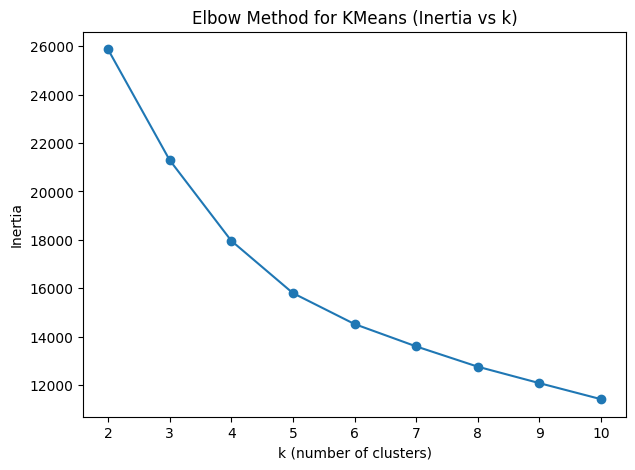

In [23]:
plt.figure(figsize=(7,5))
plt.plot(list(K_range), inertia, marker='o')
plt.title("Elbow Method for KMeans (Inertia vs k)")
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia")
plt.xticks(list(K_range))
plt.show()

In [24]:
#Silhouette scores for k choices 
sil_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

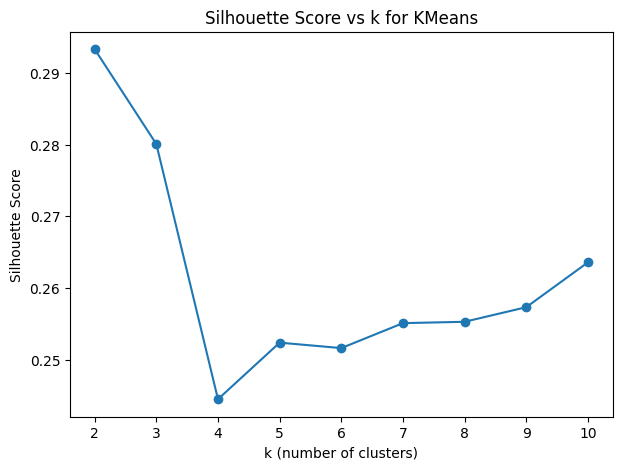

In [25]:
plt.figure(figsize=(7,5))
plt.plot(list(K_range), sil_scores, marker='o')
plt.title("Silhouette Score vs k for KMeans")
plt.xlabel("k (number of clusters)")
plt.ylabel("Silhouette Score")
plt.xticks(list(K_range))
plt.show()

In [26]:
# Choose k based on elbow + silhouette
chosen_k = 4 

In [27]:
kmeans_final = KMeans(n_clusters=chosen_k, random_state=42, n_init=20)
k_labels = kmeans_final.fit_predict(X)
k_sil = silhouette_score(X, k_labels)

In [28]:
print(f"KMeans chosen_k={chosen_k} silhouette_score={k_sil:.4f}")

KMeans chosen_k=4 silhouette_score=0.2445


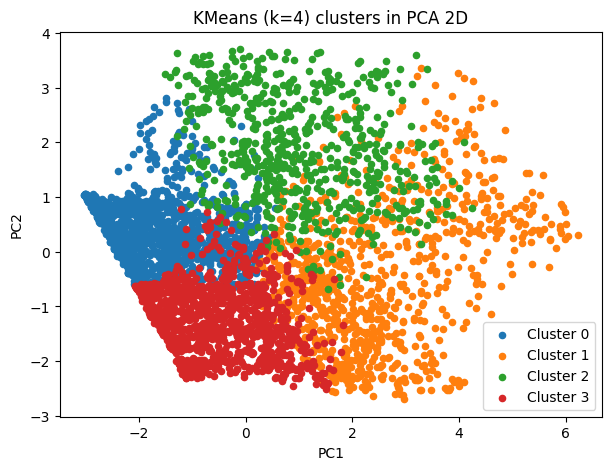

In [29]:
plt.figure(figsize=(7,5))
for lab in np.unique(k_labels):
    mask = k_labels == lab
    plt.scatter(X_pca[mask,0], X_pca[mask,1], s=20, label=f"Cluster {lab}")
plt.title(f"KMeans (k={chosen_k}) clusters in PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

In [30]:
#DBSCAN

In [31]:
min_samples = 5

In [32]:
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

In [33]:
k_distances = np.sort(distances[:, -1])

In [34]:
k_distances

array([0.026527  , 0.02659845, 0.02859207, ..., 2.36374132, 2.37923879,
       2.47136666], shape=(3999,))

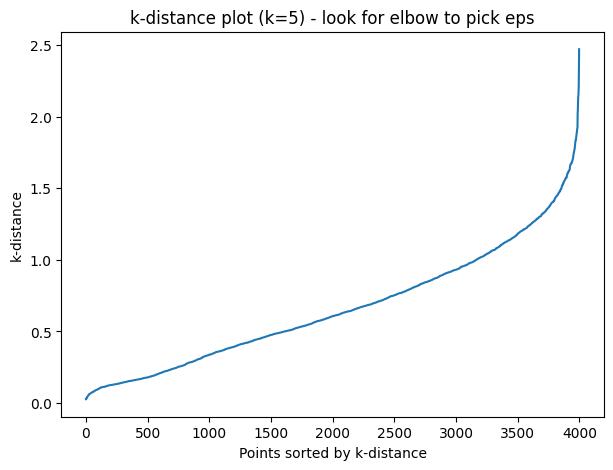

In [35]:
plt.figure(figsize=(7,5))
plt.plot(k_distances)
plt.title(f"k-distance plot (k={min_samples}) - look for elbow to pick eps")
plt.xlabel("Points sorted by k-distance")
plt.ylabel("k-distance")
plt.show()


In [36]:
# Based on the elbow on the k-distance plot
eps_choice = 0.9  

In [37]:
db = DBSCAN(eps=eps_choice, min_samples=min_samples)
db_labels = db.fit_predict(X)

In [38]:
# DBSCAN labels: -1 means noise/outliers
n_clusters_db = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise = np.sum(db_labels == -1)
print(f"DBSCAN found {n_clusters_db} clusters and {n_noise} noise points (eps={eps_choice}, min_samples={min_samples})")

DBSCAN found 28 clusters and 762 noise points (eps=0.9, min_samples=5)


In [39]:
# If DBSCAN found at least 2 clusters, compute silhouette (exclude noise)

mask_core = db_labels != -1
if n_clusters_db >= 2:
    db_sil = silhouette_score(X[mask_core], db_labels[mask_core])
    print(f"DBSCAN silhouette (excluding noise) = {db_sil:.4f}")
else:
    print("DBSCAN did not find enough clusters for silhouette score.")


DBSCAN silhouette (excluding noise) = -0.1213


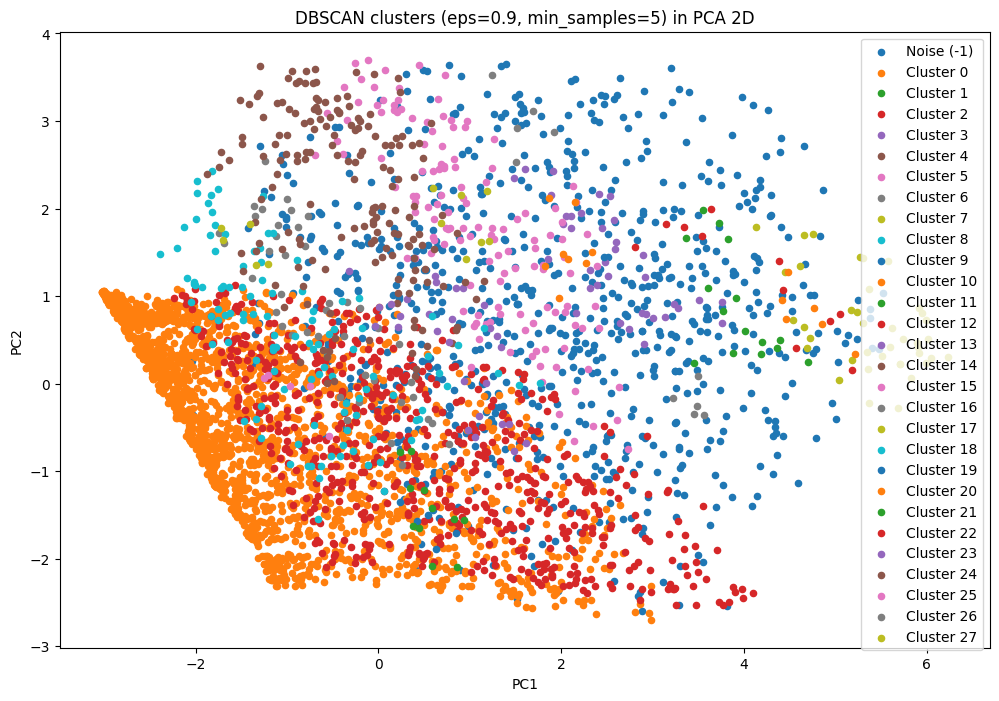

In [41]:
# Visualize DBSCAN clusters on PCA

plt.figure(figsize=(12,8))
unique_labels = np.unique(db_labels)
for lab in unique_labels:
    mask = db_labels == lab
    if lab == -1:
        label_name = "Noise (-1)"
    else:
        label_name = f"Cluster {lab}"
    plt.scatter(X_pca[mask,0], X_pca[mask,1], s=20, label=label_name)
plt.title(f"DBSCAN clusters (eps={eps_choice}, min_samples={min_samples}) in PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

In [42]:
# Comparing KMeans vs DBSCAN

In [43]:
print("KMeans cluster counts:")
(unique, counts) = np.unique(k_labels, return_counts=True)
print(dict(zip(unique, counts)))

KMeans cluster counts:
{np.int32(0): np.int64(1347), np.int32(1): np.int64(888), np.int32(2): np.int64(641), np.int32(3): np.int64(1123)}


In [44]:
print("\nDBSCAN cluster counts (including noise):")
(unique_db, counts_db) = np.unique(db_labels, return_counts=True)
print(dict(zip(unique_db, counts_db)))


DBSCAN cluster counts (including noise):
{np.int64(-1): np.int64(762), np.int64(0): np.int64(1916), np.int64(1): np.int64(10), np.int64(2): np.int64(666), np.int64(3): np.int64(36), np.int64(4): np.int64(8), np.int64(5): np.int64(120), np.int64(6): np.int64(42), np.int64(7): np.int64(39), np.int64(8): np.int64(101), np.int64(9): np.int64(5), np.int64(10): np.int64(6), np.int64(11): np.int64(11), np.int64(12): np.int64(6), np.int64(13): np.int64(23), np.int64(14): np.int64(159), np.int64(15): np.int64(17), np.int64(16): np.int64(5), np.int64(17): np.int64(7), np.int64(18): np.int64(13), np.int64(19): np.int64(5), np.int64(20): np.int64(8), np.int64(21): np.int64(5), np.int64(22): np.int64(5), np.int64(23): np.int64(5), np.int64(24): np.int64(4), np.int64(25): np.int64(5), np.int64(26): np.int64(5), np.int64(27): np.int64(5)}


In [45]:
df_with_clusters = df_numeric.copy()
df_with_clusters['KMeans_cluster'] = k_labels
df_with_clusters['DBSCAN_cluster'] = db_labels

In [46]:
cluster_summary = df_with_clusters.groupby('KMeans_cluster').mean()
print("\nKMeans cluster centers (mean of features):")
print(cluster_summary)


KMeans cluster centers (mean of features):
                         ID        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_cluster                                                                 
0               3129.394952   34622.821826         0.0   1.413512        1.0   
1               1482.623874  113424.640484         0.0   4.168919        1.0   
2               2043.875195   84112.843994         0.0   1.500780        1.0   
3               1082.167409   47850.774488         0.0   1.485307        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_cluster                                                            
0                     1.0   6190.775984     7.642910          27.780995   
1                     1.0  43711.373311    20.297297         230.201577   
2                     1.0  11409.421607    13.190328         685.032761   
3                     1.0   6375.243099     8.100623          27.692342   

                Flight_t

In [47]:
#Silhouette Score for K-Means

In [48]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Fit K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
k_labels = kmeans.fit_predict(X_scaled)

# Calculate silhouette score
kmeans_silhouette = silhouette_score(X_scaled, k_labels)
print("K-Means Silhouette Score:", kmeans_silhouette)


K-Means Silhouette Score: 0.27523536151697714


In [ ]:
#Silhouette Score for DBSCAN

In [49]:
dbscan = DBSCAN(eps=0.9, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

# Check number of clusters (ignoring noise)
n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
print("Number of DBSCAN clusters:", n_clusters)

# Silhouette score only if ≥ 2 clusters exist
if n_clusters >= 2:
    mask = db_labels != -1  # exclude noise
    dbscan_silhouette = silhouette_score(X_scaled[mask], db_labels[mask])
    print("DBSCAN Silhouette Score:", dbscan_silhouette)
else:
    print("Silhouette Score cannot be computed (DBSCAN found <2 clusters).")


Number of DBSCAN clusters: 28
DBSCAN Silhouette Score: -0.12133037942489472
